In [1]:
from GSMMutils.dynamic.rhs import get_bounds
import numpy as np
import scipy
import matplotlib.pyplot as plt

Chlorophyll

In [4]:
def get_parameters(x_storage_init, Tmax):
    T = 1/(1-x_storage_init)
    z = (T-1)/(Tmax-1)
    parameters = {
        "maximum_starch_production": 0.00128,
        "z": z
    }
    return parameters

expression = get_bounds("starch_production", get_parameters(0.2194, 1.92503))
expression

0.000891078252722407

In [33]:
param_range = [e/100 for e in np.linspace(0, 60, 100)]
res = {}
parameters = get_parameters(0.2194, 1.92503)
for param in param_range:
    temp_parameters = get_parameters(param, 1.92503)
    expression = get_bounds("starch_production", temp_parameters)
    res[float(param)] = float(round(expression,5))
res

{0.0: 0.001280069351196289,
 0.006060606060606061: 0.0012700557708740234,
 0.012121212121212121: 0.0012600421905517578,
 0.018181818181818184: 0.0012500286102294922,
 0.024242424242424242: 0.0012500286102294922,
 0.030303030303030304: 0.0012400150299072266,
 0.03636363636363637: 0.001230001449584961,
 0.04242424242424242: 0.0012199878692626953,
 0.048484848484848485: 0.0012099742889404297,
 0.05454545454545455: 0.001199960708618164,
 0.06060606060606061: 0.0011899471282958984,
 0.06666666666666667: 0.0011799335479736328,
 0.07272727272727274: 0.0011699199676513672,
 0.0787878787878788: 0.0011599063873291016,
 0.08484848484848484: 0.001149892807006836,
 0.09090909090909091: 0.0011401176452636719,
 0.09696969696969697: 0.0011301040649414062,
 0.10303030303030303: 0.0011200904846191406,
 0.1090909090909091: 0.001110076904296875,
 0.11515151515151516: 0.0011000633239746094,
 0.12121212121212122: 0.0010900497436523438,
 0.1272727272727273: 0.0010800361633300781,
 0.13333333333333333: 0.0010

r-squared: 0.9771586446400097
-0.0025379686072321225 0.001384592906083211


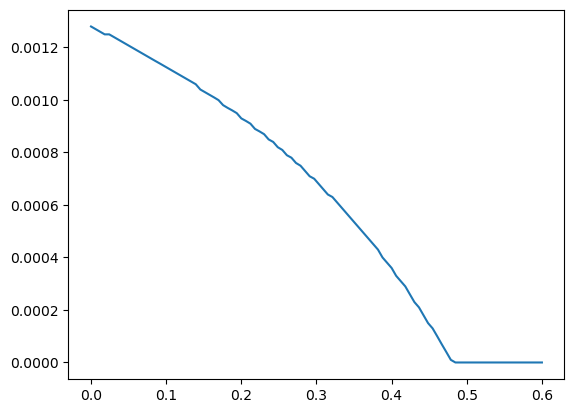

In [34]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress([float(e) for e in list(res.keys())], [float(e) for e in list(res.values())])
print("r-squared:", r_value**2)
print(slope, intercept)
fig, ax = plt.subplots()
ax.plot(list(res.keys()), list(res.values()))
# ax.hlines(y=0, xmin=0, xmax=0.11, linewidth=2, color='r')